In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("/Users/teighanmiller/development/courses/zoomcamp/ml_zoomcamp/data/car_fuel_efficiency.csv")

In [4]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [5]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

In [6]:
eda_df = df[base]

In [7]:
eda_df.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

<Axes: ylabel='Count'>

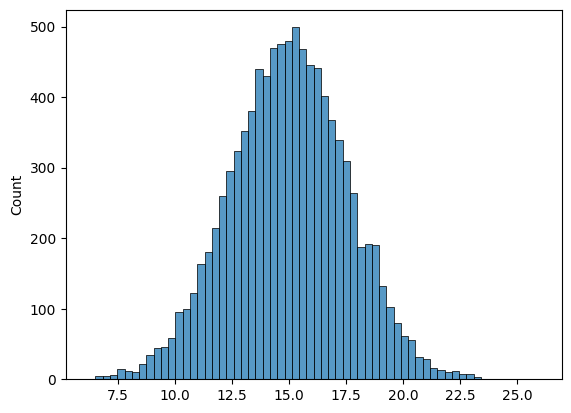

In [8]:
sns.histplot(eda_df['fuel_efficiency_mpg'].values)

Does not have a long tail

In [9]:
eda_df.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Horsepower

In [10]:
eda_df['horsepower'].median()

np.float64(149.0)

149

In [11]:
n = len(eda_df)
idx = np.arange(n)
np.random.seed(seed=42)
np.random.shuffle(idx)

In [12]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_test - n_val

In [13]:
n_train, n_val, n_test

(5824, 1940, 1940)

In [14]:
df_train = eda_df.iloc[idx[:n_train]]
df_test = eda_df.iloc[idx[n_train:n_train+n_test]]
df_val = eda_df.iloc[idx[n_train+n_test:]]

In [15]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [16]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [17]:
mean = df_train['horsepower'].mean()
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()
df_train_zero = df_train.copy()
df_val_zero = df_val.copy()

df_train_mean['horsepower'] = df_train['horsepower'].fillna(mean)
df_val_mean['horsepower'] = df_val['horsepower'].fillna(mean)
df_train_zero['horsepower'] = df_train['horsepower'].fillna(0)
df_val_zero['horsepower'] = df_val['horsepower'].fillna(0)

In [18]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [19]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [20]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [21]:
X_train_mean = df_train_mean.values
X_train_zero = df_train_zero.values
X_val_mean = df_val_mean.values
X_val_zero = df_val_zero.values

In [22]:
w0, w = train_linear_regression(X_train_mean, y_train)
p0, p = train_linear_regression(X_train_zero, y_train)

In [23]:

y_pred_mean = w0 + X_val_mean.dot(w)
y_pred_zero = p0 + X_val_zero.dot(p)

In [24]:
mean_score = rmse(y_val, y_pred_mean)
zero_score = rmse(y_val, y_pred_zero)

In [25]:
round(mean_score, 2)

np.float64(0.03)

In [26]:
round(zero_score, 2)

np.float64(0.04)

Mean score is slightly better

In [27]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train_zero = df_train_zero.values
    w0, w = train_linear_regression_reg(X_train_mean, y_train, r=r)
    y_pred = w0 + X_val_zero.dot(w)
    print(f'{r}: {round(rmse(y_val, y_pred), 2)}')

0: 0.04
0.01: 0.04
0.1: 0.04
1: 0.05
5: 0.05
10: 0.05
100: 0.05


0

In [28]:
df = pd.read_csv("/Users/teighanmiller/development/courses/zoomcamp/ml_zoomcamp/data/car_fuel_efficiency.csv")

In [29]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

In [30]:
eda_df = df[base]

In [41]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = eda_df.iloc[idx]

    df_train = df_shuffled.iloc[idx[:n_train]].copy()
    df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df_shuffled.iloc[idx[n_train+n_val:]].copy()

    # extract the fuel efficiency values
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    # delete the answer from datasets
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    df_train_zero = df_train.copy()
    df_val_zero = df_val.copy()
    df_test_zero = df_test.copy()

    df_train_zero['horsepower'] = df_train['horsepower'].fillna(0)
    df_val_zero['horsepower'] = df_val['horsepower'].fillna(0)
    df_test_zero['horsepower'] = df_test['horsepower'].fillna(0)

    X_train_zero = df_train_zero.values
    X_val_zero = df_val_zero.values
    w0, w = train_linear_regression(X_train_zero, y_train)
    y_pred = w0 + X_val_zero.dot(w)
    scores.append(rmse(y_val, y_pred))

In [42]:
round(np.std(scores), 3)

np.float64(0.005)

0.006 is the closest

In [34]:
df = pd.read_csv("/Users/teighanmiller/development/courses/zoomcamp/ml_zoomcamp/data/car_fuel_efficiency.csv")
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
eda_df = df[base]
np.random.seed(seed=9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = eda_df.iloc[idx[:n_train]].copy()
df_val = eda_df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = eda_df.iloc[idx[n_train+n_val:]].copy()

# extract the fuel efficiency values
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# delete the answer from datasets
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_train_zero = df_train.copy()
df_val_zero = df_val.copy()
df_test_zero = df_test.copy()

df_train_zero['horsepower'] = df_train['horsepower'].fillna(0)
df_val_zero['horsepower'] = df_val['horsepower'].fillna(0)
df_test_zero['horsepower'] = df_test['horsepower'].fillna(0)

df_full = pd.concat([df_train_zero, df_val_zero])
y_full = np.concatenate([y_train, y_val])

X_full = df_full.values
w0, w = train_linear_regression_reg(X_full, y_full, r=0.001)
y_pred = w0 + df_test_zero.values.dot(w)
round(rmse(y_test, y_pred), 3)

np.float64(0.516)